In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## ANOMALY DETECTION PART 5 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [2]:
#=================================================-
#### Slide 4: Import packages  ####

from pathlib import Path
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import pickle
from math import sqrt
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error




In [3]:
# Set 'main_dir' to location of the project folder
from pathlib import Path 
data_dir = Path.cwd().parent / "data"

In [4]:
#=================================================-
#### Slide 6: Load PJM Energy dataset  ####

pjm_energy = pd.read_csv(data_dir / "PJME_hourly.csv", parse_dates=['Datetime'], index_col='Datetime')
print(pjm_energy.head())
pjm_energy.dtypes

                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0


PJME_MW    float64
dtype: object

In [5]:
pjm_energy = pjm_energy['2018':]

In [6]:
pjm_energy

,PJME_MW
Datetime,
2018-01-01 00:00:00,39928.0
2018-08-02 01:00:00,34283.0
2018-08-02 02:00:00,32094.0
2018-08-02 03:00:00,30543.0
2018-08-02 04:00:00,29791.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [7]:
pjm_energy = pjm_energy.reset_index()

In [8]:
#=================================================-
#### Slide 7: Extract Date from Datetime  ####

pjm_energy = pjm_energy.assign(Date=pjm_energy['Datetime'].dt.date)

In [9]:
pjm_energy

,Datetime,PJME_MW,Date
0,2018-01-01 00:00:00,39928.0,2018-01-01
1,2018-08-02 01:00:00,34283.0,2018-08-02
2,2018-08-02 02:00:00,32094.0,2018-08-02
3,2018-08-02 03:00:00,30543.0,2018-08-02
4,2018-08-02 04:00:00,29791.0,2018-08-02
...,...,...,...
5131,2018-01-01 20:00:00,44284.0,2018-01-01
5132,2018-01-01 21:00:00,43751.0,2018-01-01
5133,2018-01-01 22:00:00,42402.0,2018-01-01
5134,2018-01-01 23:00:00,40164.0,2018-01-01


In [10]:
pjm_energy_datewise = pjm_energy.groupby('Date')[['PJME_MW']].mean()

In [11]:
pjm_energy_datewise

,PJME_MW
Date,
2018-01-01,40191.041667
2018-01-02,41627.333333
2018-01-03,40852.750000
2018-01-04,41065.000000
2018-01-05,44197.791667
...,...
2018-07-30,32957.416667
2018-07-31,34539.083333
2018-08-01,39230.791667


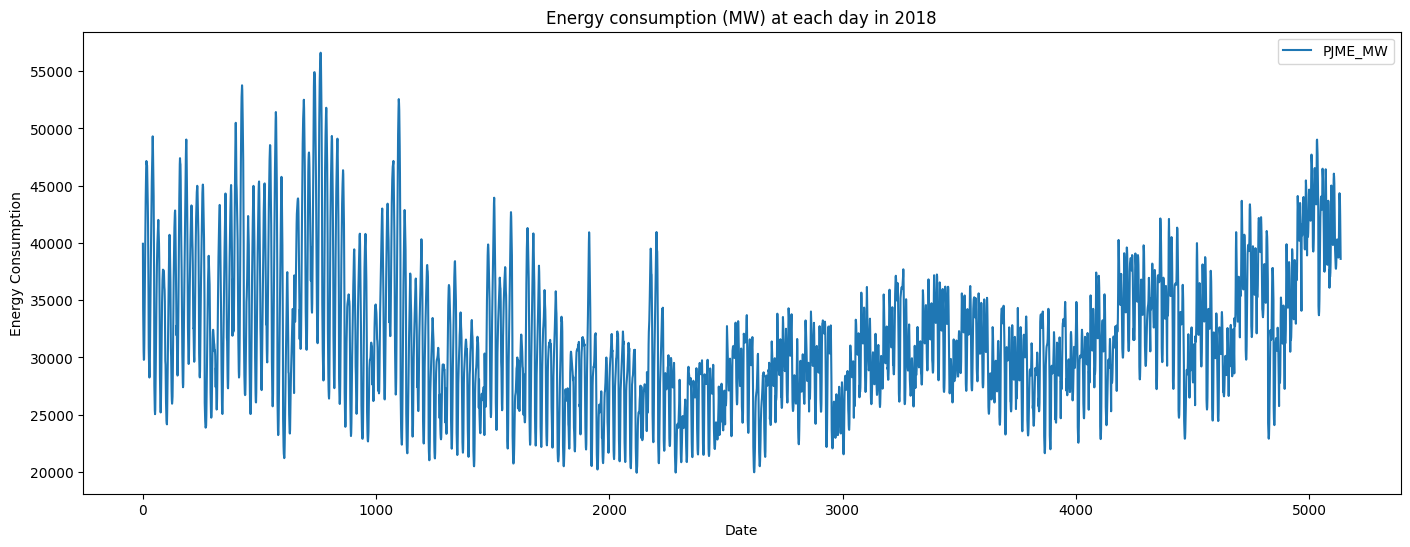

In [12]:
#=================================================-
#### Slide 8: Visualize the Energy consumption for each day  ####

pjm_energy.plot(y="PJME_MW", figsize=(17,6))
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy consumption (MW) at each day in 2018');

In [13]:
pjm_energy_datewise

,PJME_MW
Date,
2018-01-01,40191.041667
2018-01-02,41627.333333
2018-01-03,40852.750000
2018-01-04,41065.000000
2018-01-05,44197.791667
...,...
2018-07-30,32957.416667
2018-07-31,34539.083333
2018-08-01,39230.791667


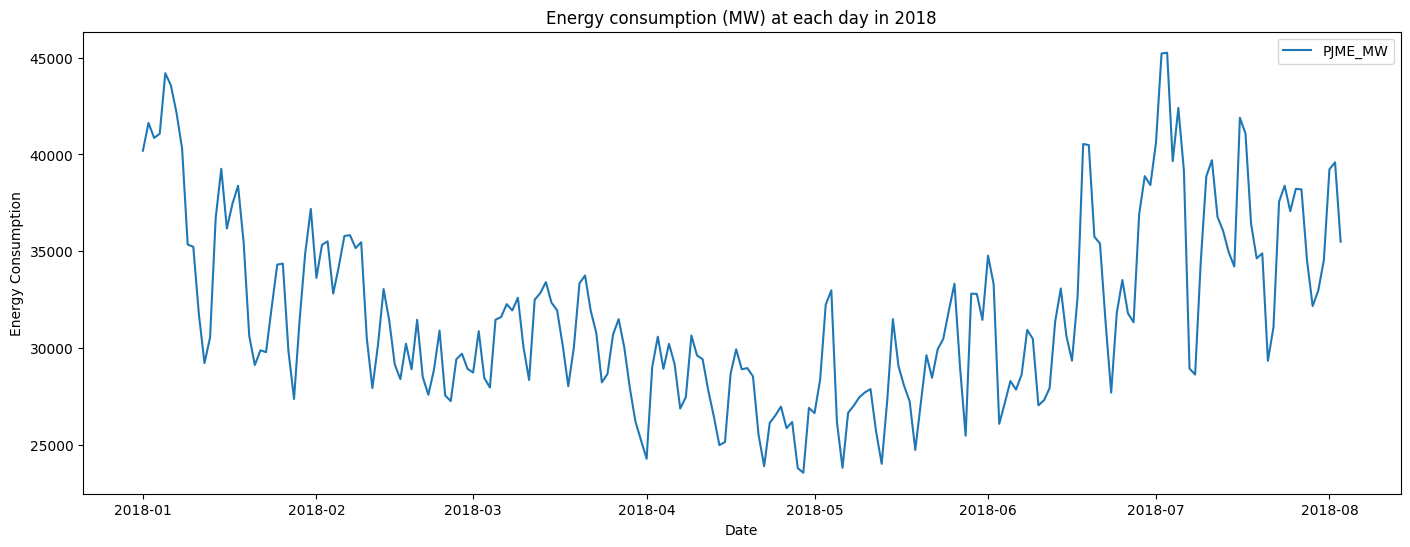

In [14]:
#=================================================-
#### Slide 8: Visualize the Energy consumption for each day  ####

pjm_energy_datewise.plot(figsize=(17,6))
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy consumption (MW) at each day in 2018');

In [15]:
#=================================================-
#### Slide 28: Stationarity test  ####

# Perform ADF test on original series.
result_pm = adfuller(pjm_energy_datewise)

print('ADF Statistic: %f' % result_pm[0])
print('p-value: %f' % result_pm[1])

ADF Statistic: -1.625936
p-value: 0.469618


In [16]:
#=================================================-
#### Slide 51: Exercise 1  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
